In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Walmart.csv to Walmart.csv


In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Walmart.csv")

**Data Preprocessing Steps**


In [ ]:
#check for null values
df.isnull().sum() #no null values

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
#checking for duplicates
df.duplicated().sum()#no duplicates

0

<ipython-input-11-dbd7b43d18e8>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[x].dtypes==np.number:


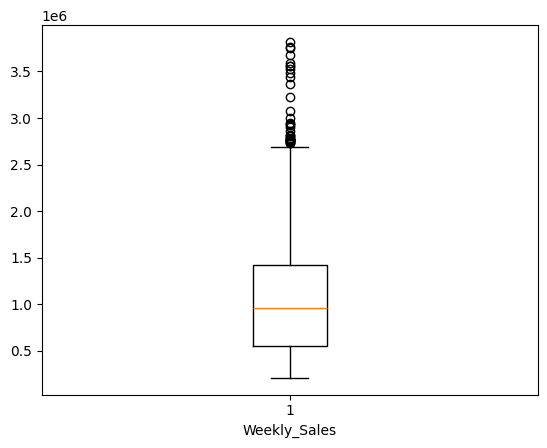

<ipython-input-11-dbd7b43d18e8>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[x].dtypes==np.number:


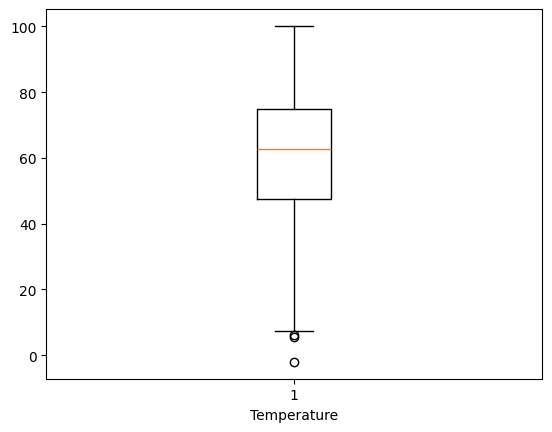

<ipython-input-11-dbd7b43d18e8>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[x].dtypes==np.number:


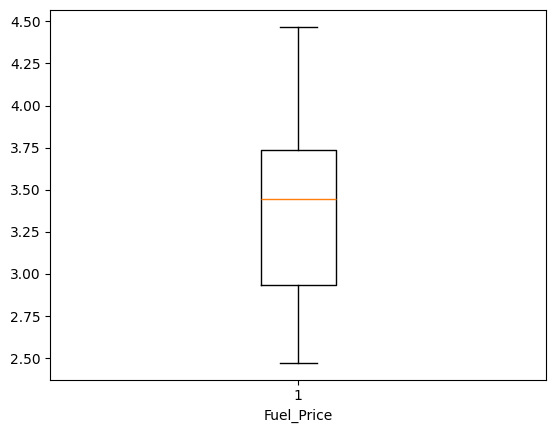

<ipython-input-11-dbd7b43d18e8>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[x].dtypes==np.number:


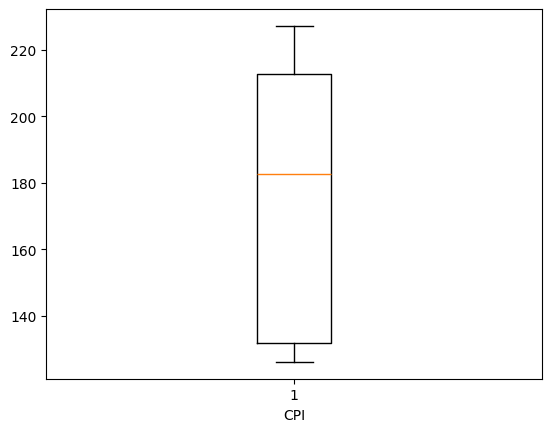

<ipython-input-11-dbd7b43d18e8>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[x].dtypes==np.number:


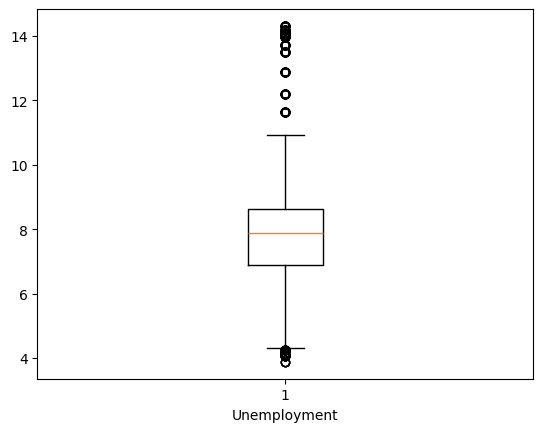

In [ ]:
#checking for outliers.
col_list=list(df.columns)
for x in col_list:
  if df[x].dtypes==np.number:
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.show()
    #Since it is a time series data so maybe events like natural disasters or economic crisis or festivals can cause changes in data which may
    #be seen as outliers so we won't remove outliers as these changes are important to be analysed by the model.

a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

In [ ]:
df.groupby("Unemployment")["Weekly_Sales"].mean()

,Weekly_Sales
Unemployment,
3.879,2.147431e+06
4.077,2.138215e+06
4.125,1.200639e+06
4.145,1.184903e+06
4.156,1.212103e+06
...,...
13.975,9.520325e+05
14.021,8.956935e+05
14.099,8.835055e+05


In [ ]:
#Let's find the correlation between Unemployment and Weekly_Sales column
correlation=df["Unemployment"].corr(df["Weekly_Sales"])
print("Correlation Between Unemploymnet and Weekly_Sales=",correlation)

Correlation Between Unemploymnet and Weekly_Sales= -0.10617608965795429


The correlation is approximately -0.11 which tells us that as Unemployment increases the weekly sales decrease but the relationship is weak.

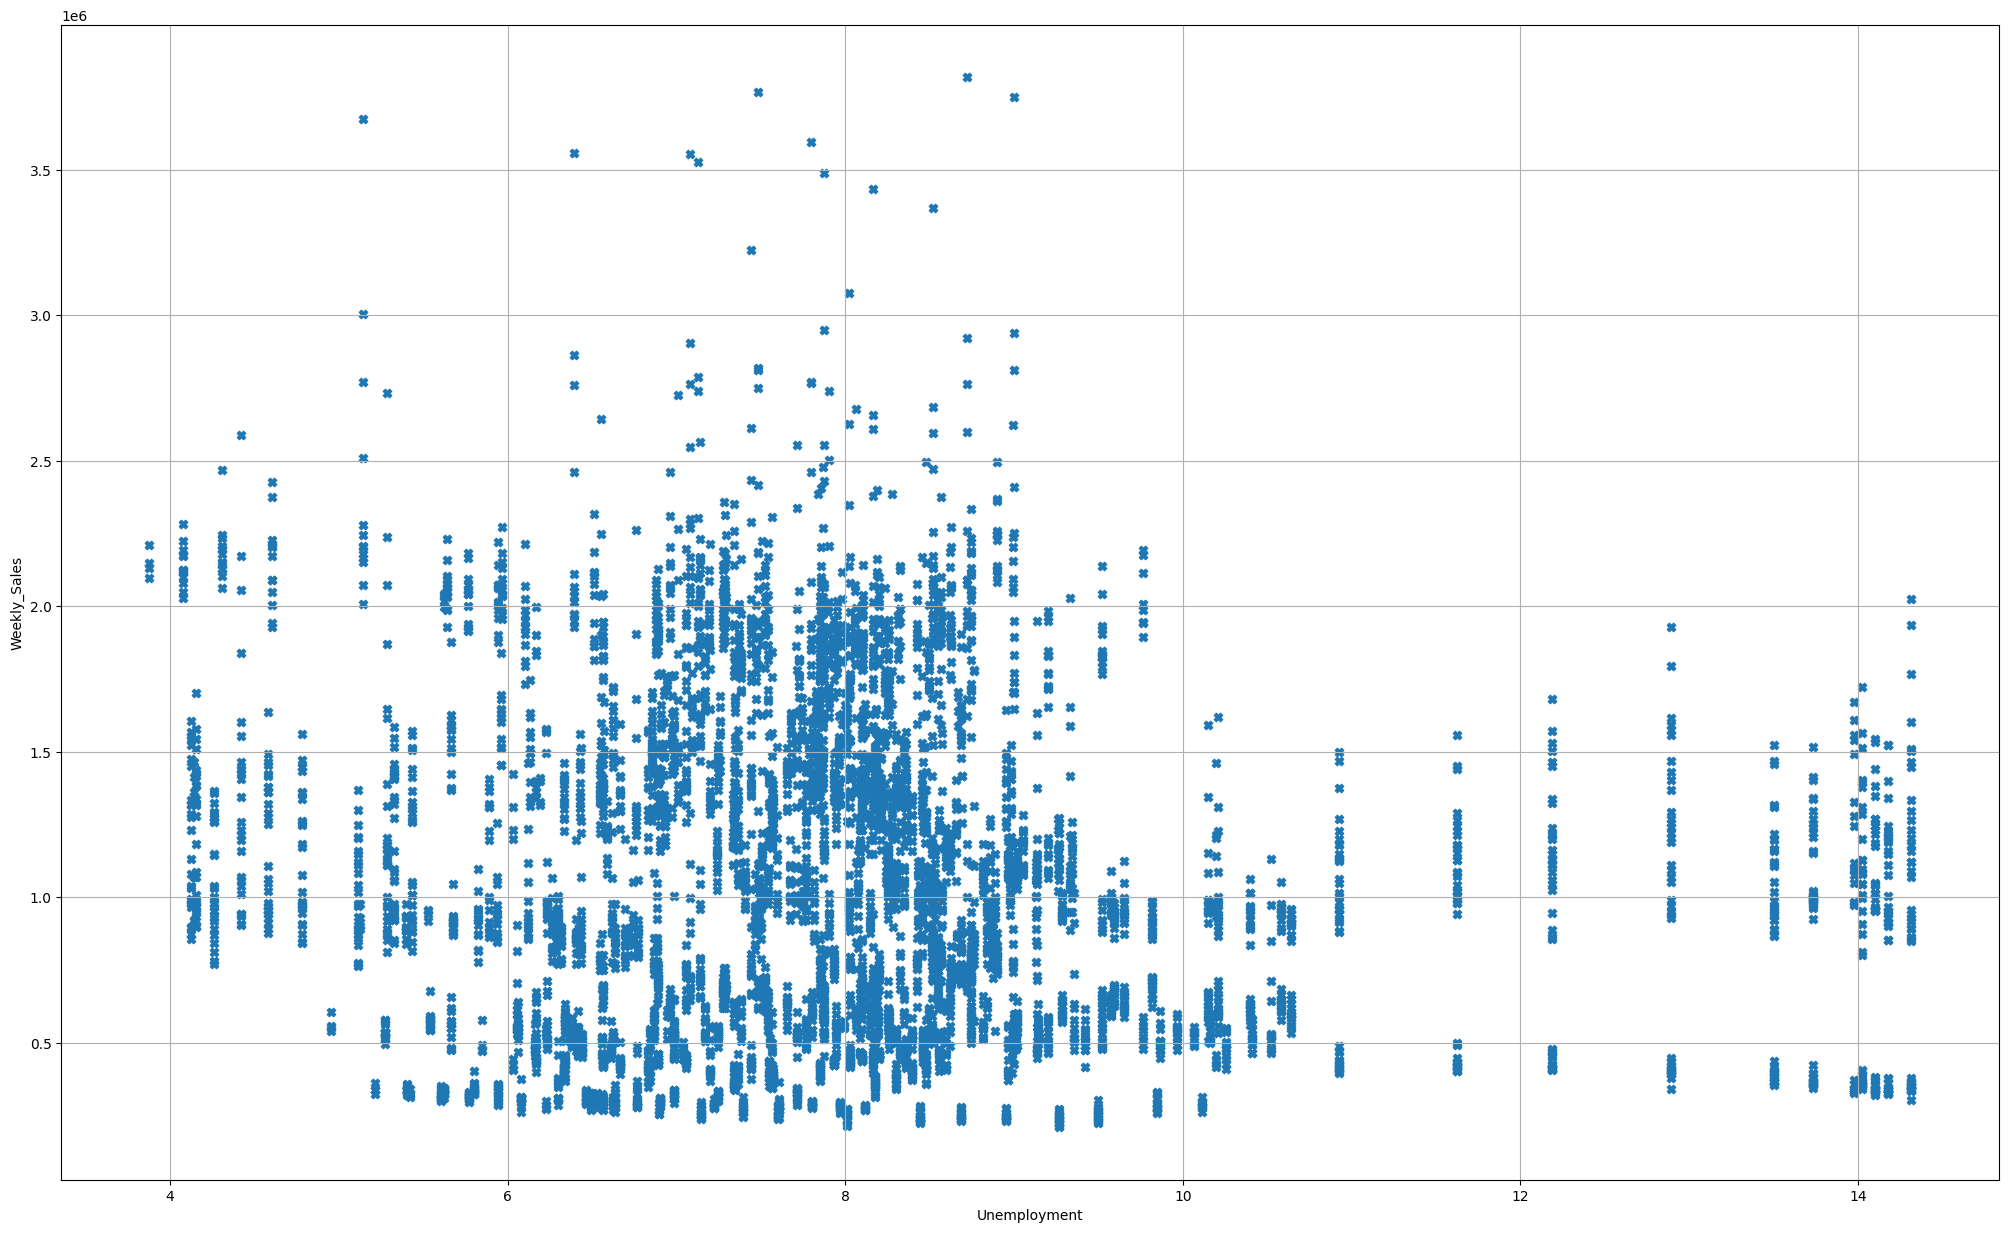

In [ ]:
#Let's plot a scatter plot between Unemployment and Weekly_Sales to see if there is a trend
plt.figure(figsize=(25,15))
plt.scatter(df["Unemployment"],df["Weekly_Sales"],marker='X')
plt.xlabel("Unemployment")
plt.ylabel("Weekly_Sales")
plt.grid()
plt.show()

There is no clear relationship between Umployment and Weekly_Sales column


b. If the weekly sales show a seasonal trend, when and what could be the reason?


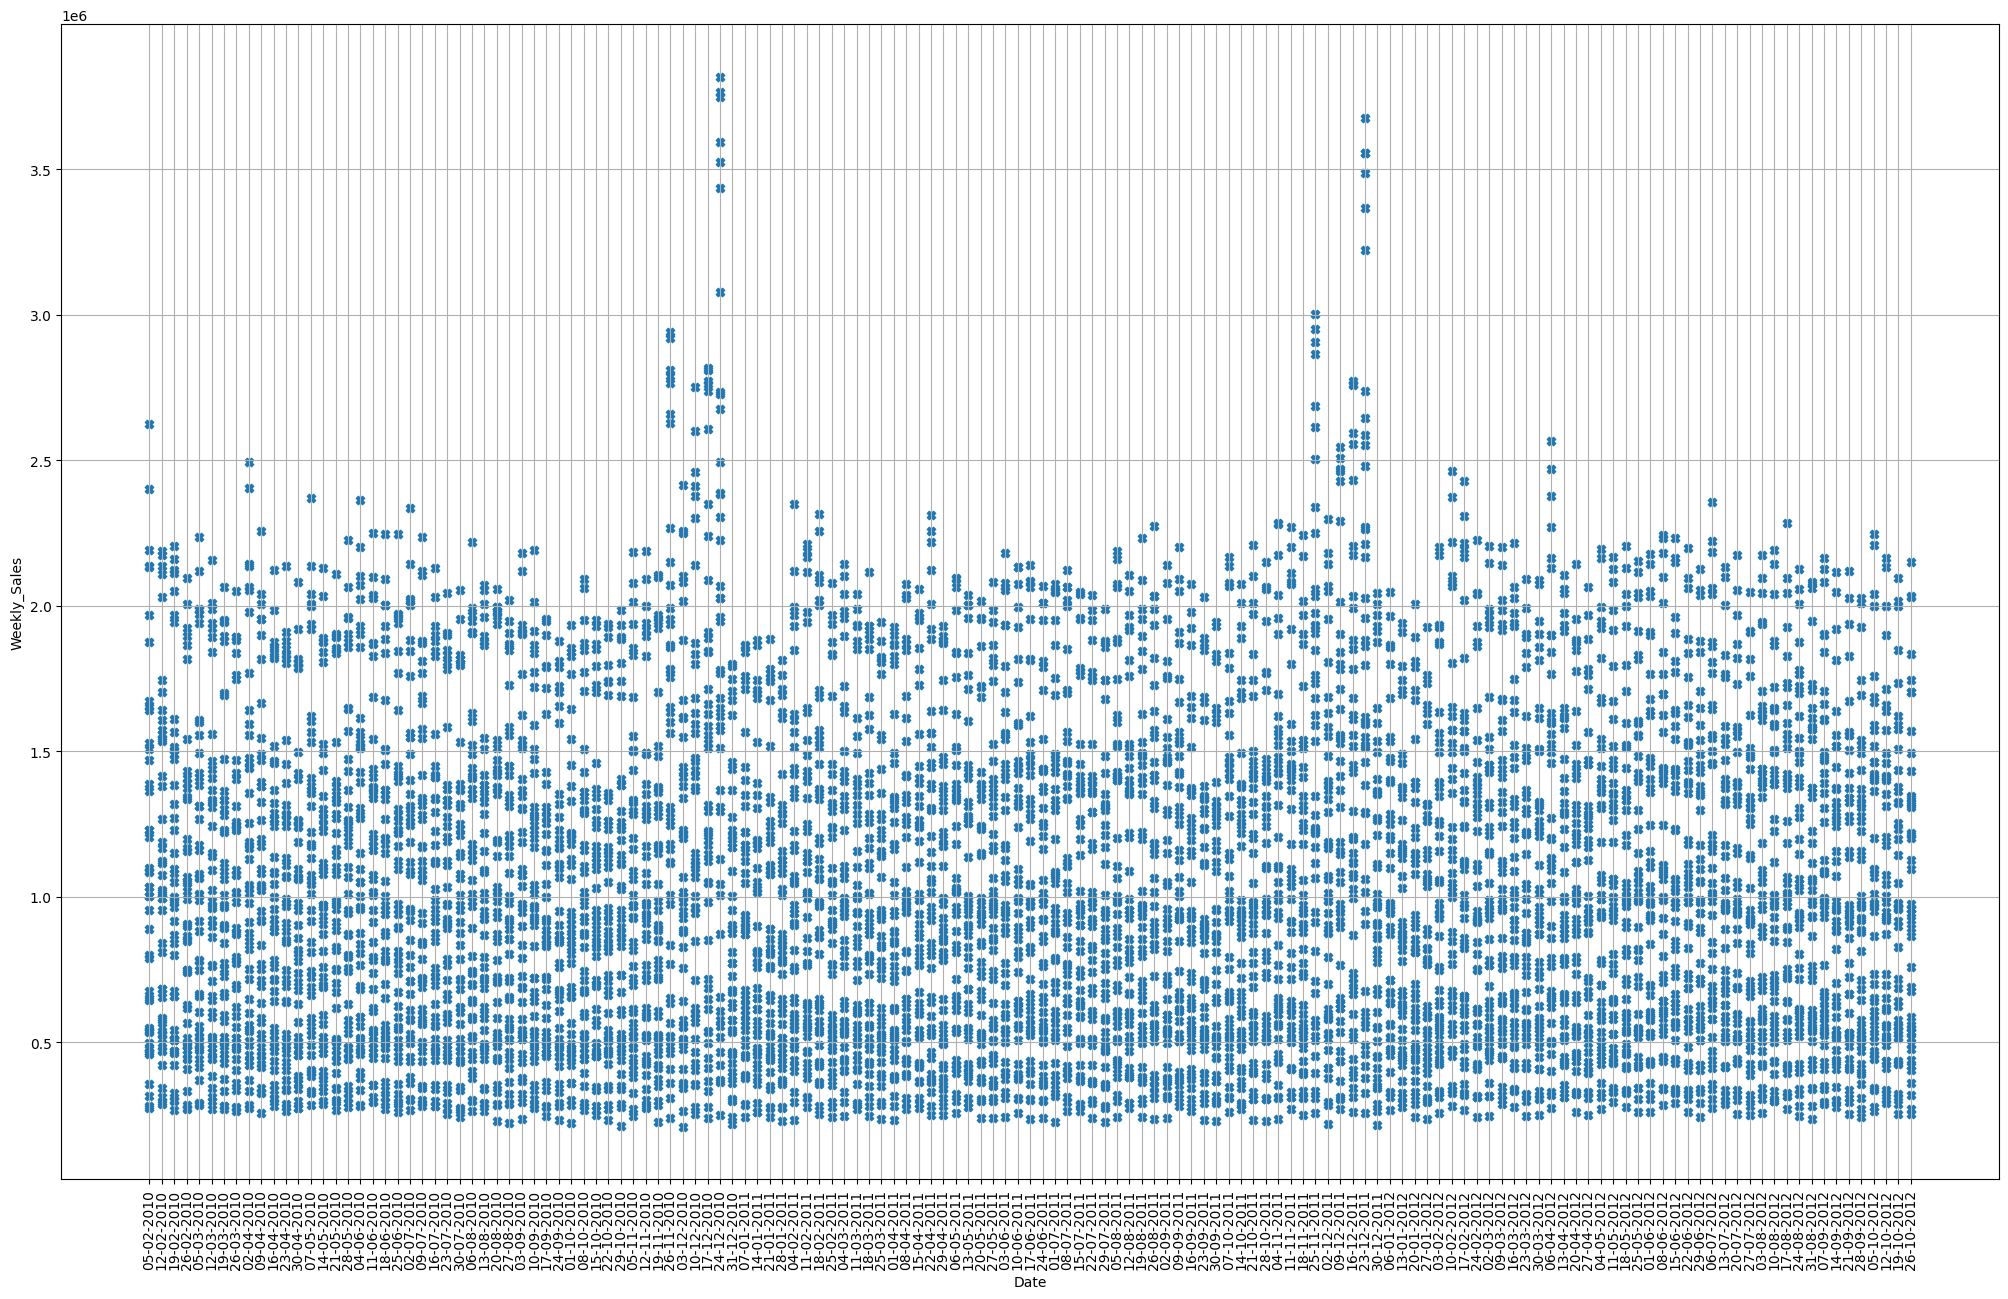

In [ ]:
plt.figure(figsize=(25,15))
plt.scatter(df['Date'],df["Weekly_Sales"],marker="X")
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.xticks(rotation=90)
plt.grid()
plt.show()

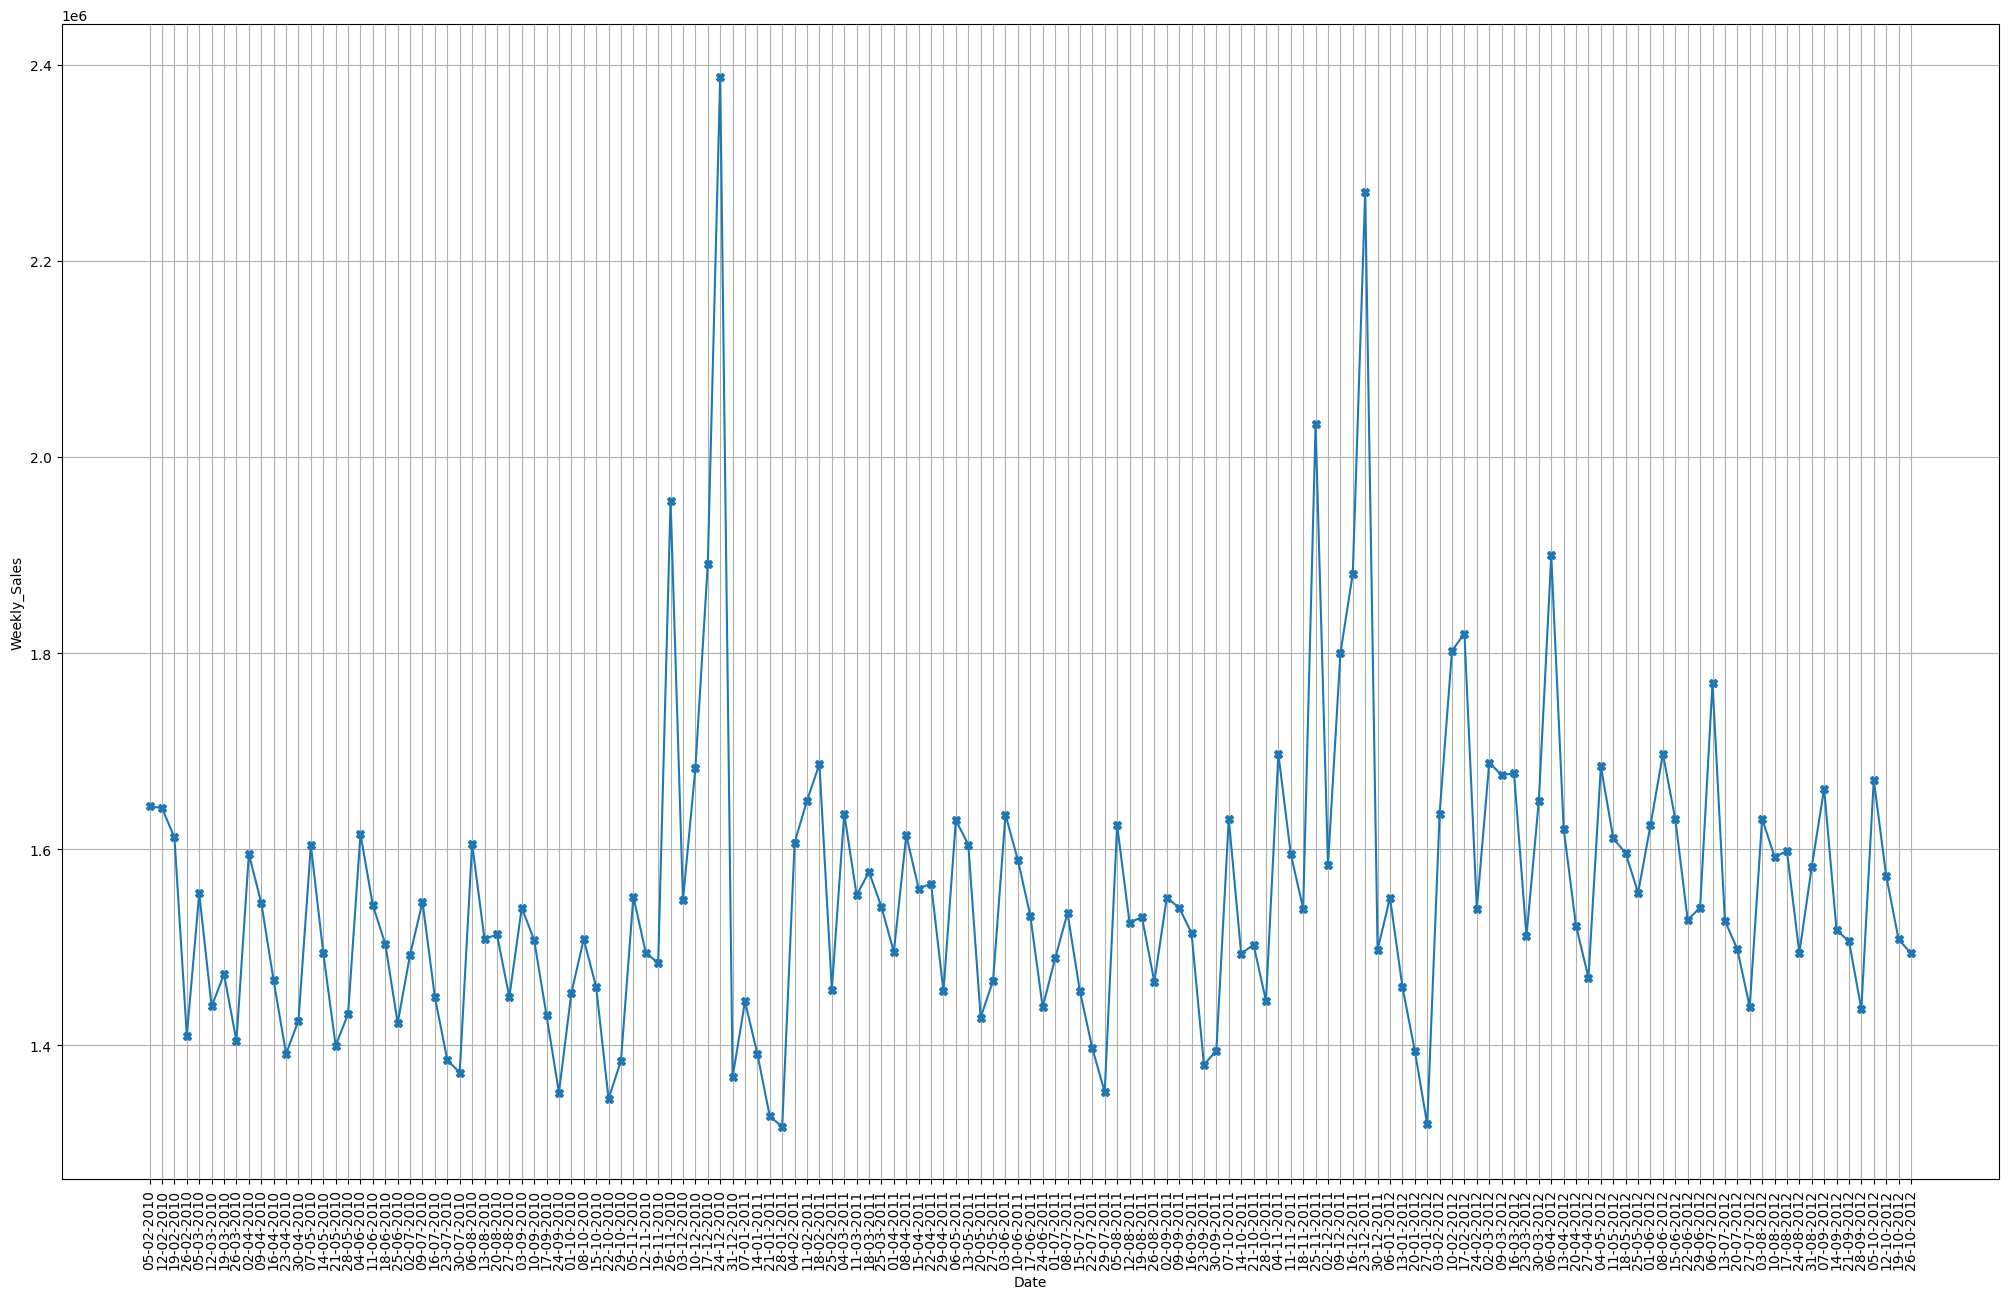

In [ ]:
#The above plot looks like a mess because it is a data of 45 different dtore combined.
#Let's check the data for store 1 for better analyis
plt.figure(figsize=(25,15))
plt.plot(df[df['Store']==1]['Date'],df[df['Store']==1]["Weekly_Sales"],marker="X")
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.xticks(rotation=90)
plt.grid()
plt.show()

Yes,as we can see there is a seasonal trend in the data. The sales are high for dates like 05-02-2010,05-03-2010,02-04-2010,07-05-2010,etc which are dates for the starting weeks of the month(People get their salaries at the start of the month so the sales show a peak).During dates of month ends like 26-02-2010,26-03-2010,23-04-2010,28-05-2010,etc there is a dip in the sales(low sales)(people have less money to spend during month end hence low sales).
There is also highest peaks during dates 24-12-2010,23-12-2011 which is a week before new year and christmas so sale is at highest.  

c. Does temperature affect the weekly sales in any manner?

In [ ]:
#correlation between Temperature and Weekly_Sales
correlation1=df["Temperature"].corr(df["Weekly_Sales"])
print("Correlation between Temperature and Weekly_Sales=",correlation1)

Correlation between Temperature and Weekly_Sales= -0.06381001317946955


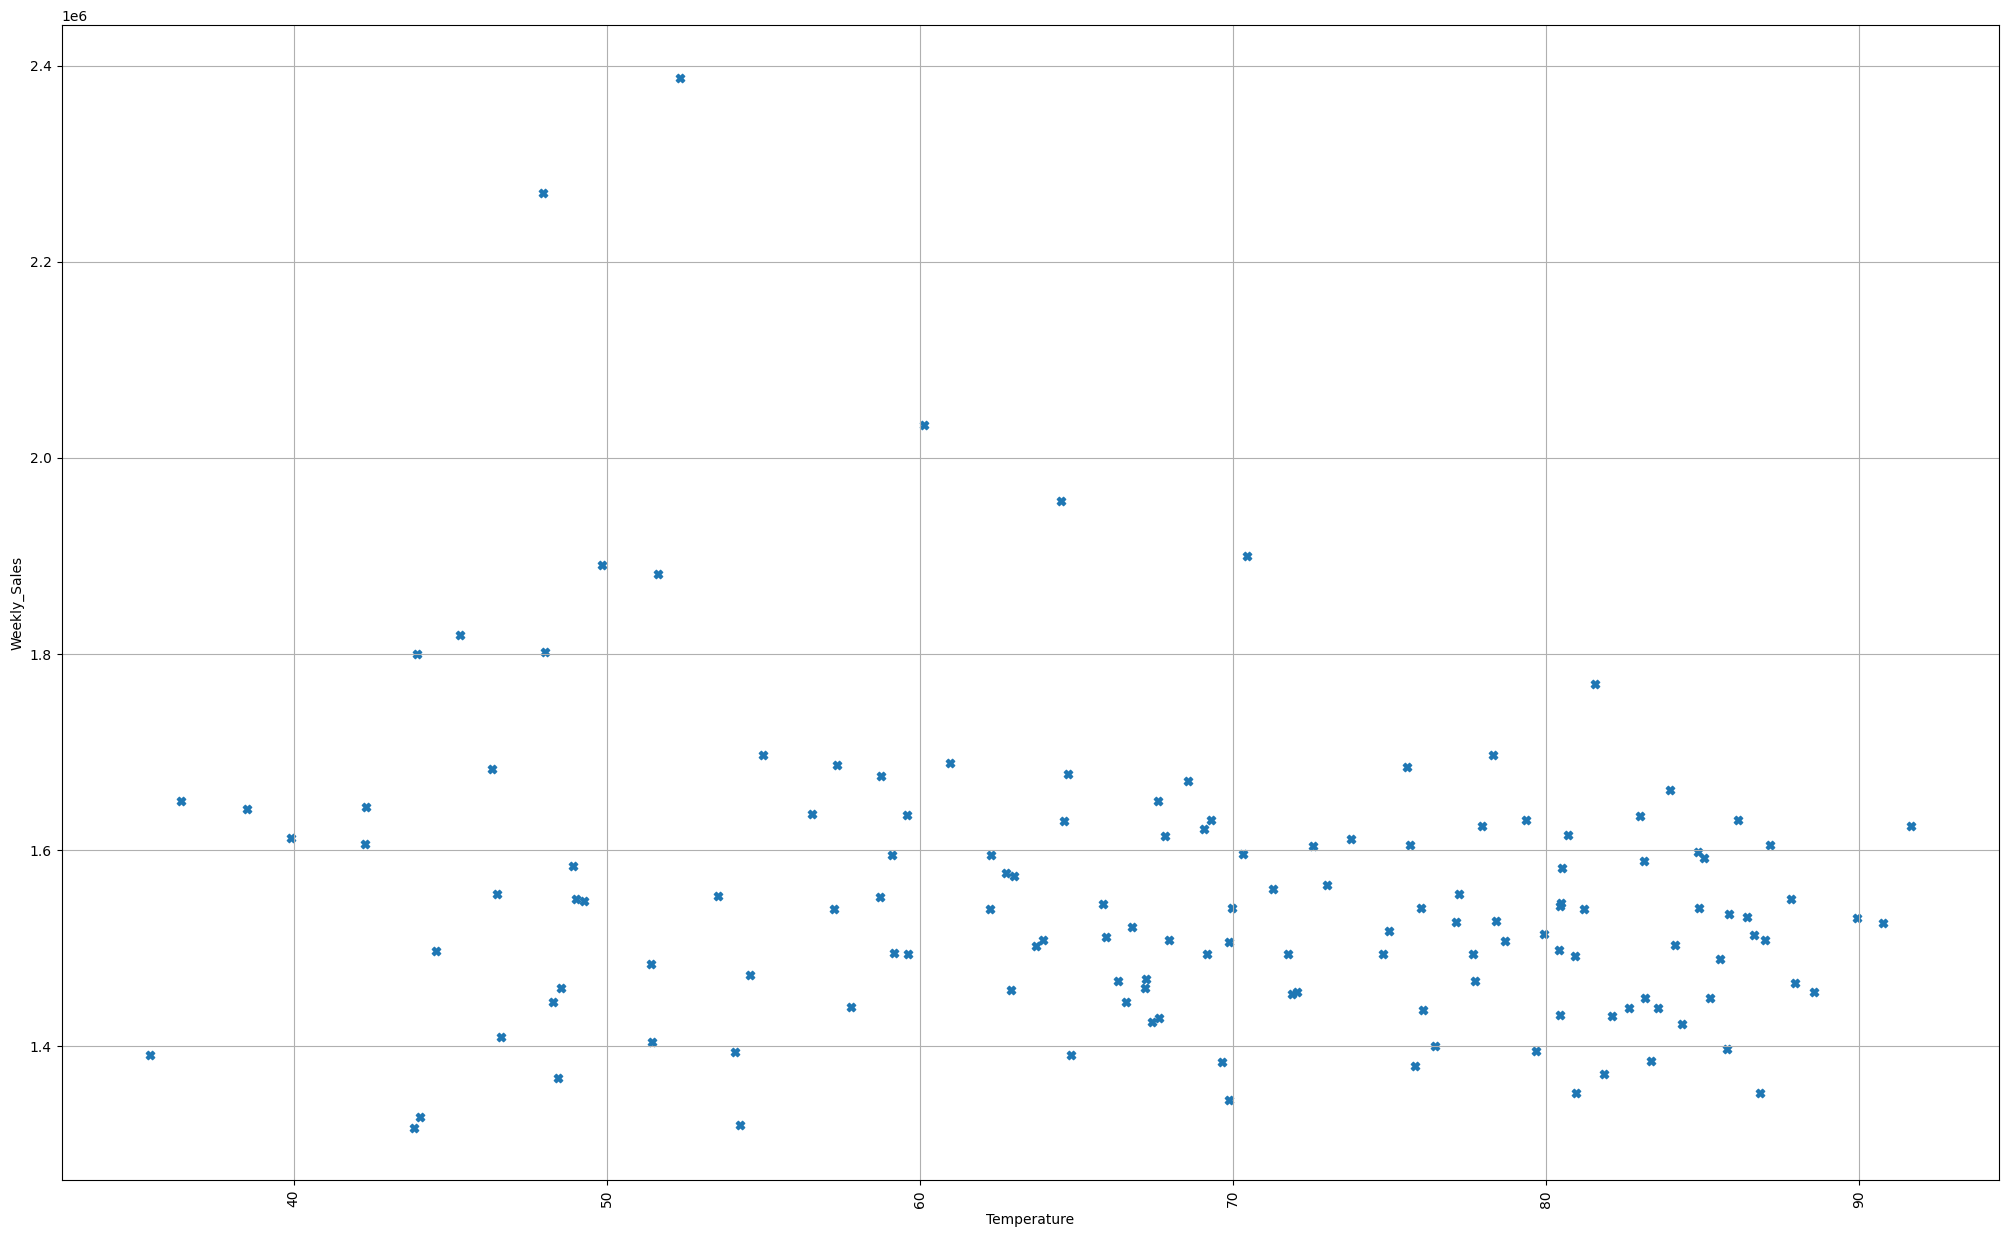

In [ ]:
#Scatter plot between Temperature and Weekly_Sales
plt.figure(figsize=(25,15))
plt.scatter(df[df['Store']==1]['Temperature'],df[df['Store']==1]["Weekly_Sales"],marker="X")
plt.xlabel("Temperature")
plt.ylabel("Weekly_Sales")
plt.xticks(rotation=90)
plt.grid()
plt.show()

There is no strong relationship between temperature and weekly sales. (We can also see in the above graph that between 50 to 60 on temperature axis, the sales have a peak so we might say that sales are more during moderate temperature but cannot strongly support this point).
By the plot we can see that there is no significant relationship between temperature and weekly sales.

d. How is the Consumer Price index affecting the weekly sales of various stores?

In [ ]:
#Let's see correlation between CPI and Weekly_Sales
correlation2=df["CPI"].corr(df["Weekly_Sales"])
print("Correlation Between CPI and Weekly_Sales=",correlation2)

Correlation Between CPI and Weekly_Sales= -0.07263416204017632


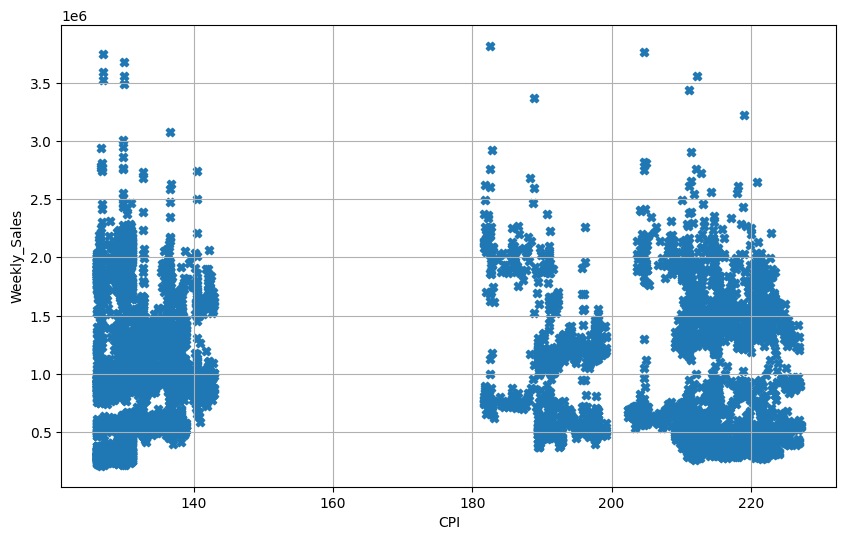

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["CPI"],df["Weekly_Sales"],marker="X")
plt.xlabel("CPI")
plt.ylabel("Weekly_Sales")
plt.grid()
plt.show()

As we can see, there is no strong relatonship between Cost Price Index and Weekly_Sales. The scatter plot also shows no clear trend between them.

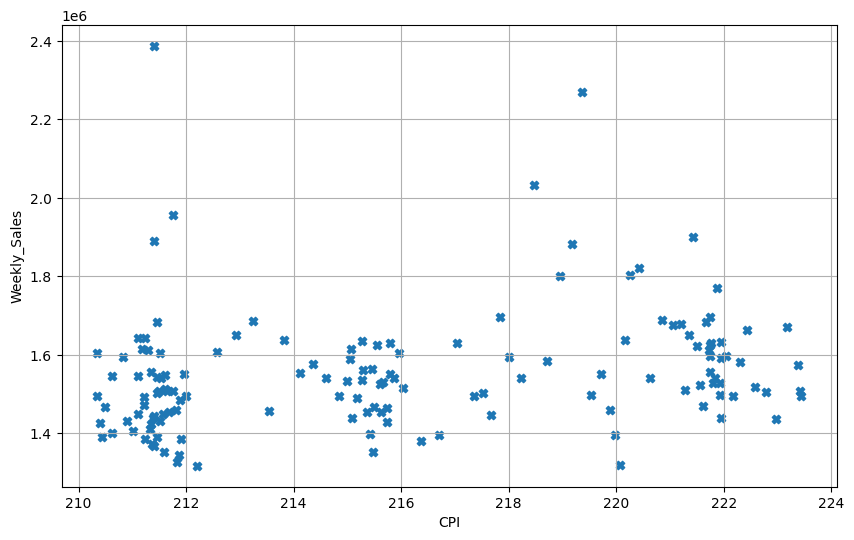

In [ ]:
#Lets's see for store 1
plt.figure(figsize=(10,6))
plt.scatter(df[df["Store"]==1]["CPI"],df[df["Store"]==1]["Weekly_Sales"],marker="X")
plt.xlabel("CPI")
plt.ylabel("Weekly_Sales")
plt.grid()
plt.show()

In [ ]:
correlation2=df[df["Store"]==1]["CPI"].corr(df[df["Store"]==1]["Weekly_Sales"])
print("Correlation Between CPI and Weekly_Sales=",correlation2)

Correlation Between CPI and Weekly_Sales= 0.2254076594290444


Weak positive correlation can be seen between CPI and Weekly_Sales of a particular store(Store 1).


In [ ]:
df.columns


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

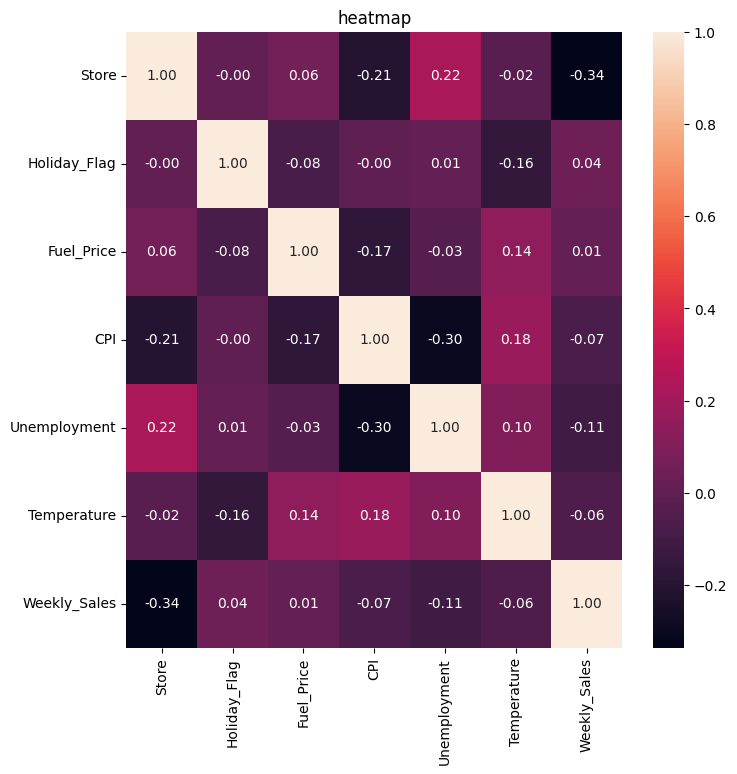

In [ ]:
#Let's see heatmap of the data
numeric_data=df[['Store','Holiday_Flag','Fuel_Price', 'CPI', 'Unemployment', 'Temperature', 'Weekly_Sales']]
numeric_Correlation=numeric_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(numeric_Correlation,annot=True,fmt=".2f")
plt.title("heatmap")
plt.show()

As we can see from heat map that there no strong relationship between any of the variables and Weekly_Sales.
Let's write down all the weak relatonships:

**1)Holiday_Flag vs Weekly_Sales-** 0.04 which is very weak positive relationship stating that sales are more during holidays.

**2)Fuel_Price vs Weekly_Sales-** 0.01 which is again very weak relationship(negligible) stating sales are more when fuel price is more.

**3)CPI vs Weekly_Sales-** -0.07 which is very weak negative relationship stating that sales decrease when CPI is more.

**4)Unemployment vs Weekly_Sales-** -0.11 which is very weak negative relationship stating that sales decrease when unemployment is more.

**5)Temperature vs Weekly_Sales-** -0.06 which is very weak negative relationship stating that sales decrease when temperature is more.

Since these are weak relationships hence we can ignore them.


e. Top performing stores according to the historical data.

In [ ]:
df.groupby("Store")["Weekly_Sales"].mean().reset_index().sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Weekly_Sales
19,20,2.107677e+06
3,4,2.094713e+06
13,14,2.020978e+06
12,13,2.003620e+06
1,2,1.925751e+06


These are the top 5 stores as per  highest mean sales. Store 20,4,14,13,2

In [ ]:
#Let's check the growth of the stores.
df["Date"]=pd.to_datetime(df["Date"],format="%d-%m-%Y")#making Date column into Date format

In [ ]:
df[(df["Store"]==1)]["Weekly_Sales"].corr(df[df["Store"]==1]['CPI'])

0.2254076594290444

In [ ]:
df_copy=df.copy()
df_copy["Year"]=df_copy["Date"].dt.year


In [ ]:
df_YOY=df_copy.groupby(["Store","Year"])["Weekly_Sales"].mean().reset_index()

In [ ]:
df.Date.max()

Timestamp('2012-10-26 00:00:00')

In [ ]:
df.Date.min()

Timestamp('2010-02-05 00:00:00')

In [ ]:
df_YOY

,Store,Year,Weekly_Sales
0,1,2010,1.526642e+06
1,1,2011,1.556191e+06
2,1,2012,1.586094e+06
3,2,2010,1.984956e+06
4,2,2011,1.896305e+06
...,...,...,...
130,44,2011,2.980422e+05
131,44,2012,3.299389e+05
132,45,2010,8.028405e+05
133,45,2011,7.910648e+05


In [ ]:
df_YOY["PCT"]=df_YOY.groupby(["Store"])["Weekly_Sales"].pct_change()

In [ ]:
df_YOY

,Store,Year,Weekly_Sales,PCT
0,1,2010,1.526642e+06,NaN
1,1,2011,1.556191e+06,0.019355
2,1,2012,1.586094e+06,0.019216
3,2,2010,1.984956e+06,NaN
4,2,2011,1.896305e+06,-0.044661
...,...,...,...,...
130,44,2011,2.980422e+05,0.051332
131,44,2012,3.299389e+05,0.107021
132,45,2010,8.028405e+05,NaN
133,45,2011,7.910648e+05,-0.014668


In [ ]:
df_YOY_AVG=df_YOY.groupby("Store")["PCT"].sum().reset_index()

In [ ]:
df_YOY_AVG["AVG_PCT"]=df_YOY_AVG["PCT"]/2

In [ ]:
df_YOY_AVG.sort_values(by="AVG_PCT",ascending=False)

,Store,PCT,AVG_PCT
37,38,0.239539,0.119770
43,44,0.158353,0.079177
38,39,0.114775,0.057388
6,7,0.107474,0.053737
40,41,0.097763,0.048882
16,17,0.091928,0.045964
41,42,0.090339,0.045170
3,4,0.081629,0.040815
2,3,0.072164,0.036082
4,5,0.065080,0.032540


In [ ]:
df_YOY_AVG[df_YOY_AVG["AVG_PCT"]>0].sort_values(by="AVG_PCT",ascending=False)

,Store,PCT,AVG_PCT
37,38,0.239539,0.119770
43,44,0.158353,0.079177
38,39,0.114775,0.057388
6,7,0.107474,0.053737
40,41,0.097763,0.048882
16,17,0.091928,0.045964
41,42,0.090339,0.045170
3,4,0.081629,0.040815
2,3,0.072164,0.036082
4,5,0.065080,0.032540


**ANS 1(e)-** Store no. 37,43,38,6,40 are the top 5 performing stores as per mean sales growth every year with Store 37 performing the best showing growth of 0.19%.(We have considered mean sales instead of total sales because the data for year 2010 and 2012 is 10 months but data of year 2011 is of 12 months so it will give wrong value of growth.

f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.


In [ ]:
df_YOY_AVG[df_YOY_AVG["AVG_PCT"]<0].sort_values(by="AVG_PCT")

,Store,PCT,AVG_PCT
35,36,-0.325205,-0.162602
34,35,-0.253761,-0.126881
13,14,-0.188684,-0.094342
14,15,-0.139419,-0.069710
26,27,-0.111186,-0.055593
17,18,-0.104068,-0.052034
20,21,-0.103801,-0.051900
18,19,-0.091403,-0.045702
28,29,-0.080120,-0.040060
9,10,-0.077115,-0.038558


In [ ]:
df1=df.groupby("Store")["Weekly_Sales"].mean().reset_index()
df1[(df1["Store"]==37) | (df1["Store"]==36)]

,Store,Weekly_Sales
35,36,373511.992797
36,37,518900.281958


In [ ]:
mean_37=df[df['Store']==37]['Weekly_Sales'].mean()
mean_36=df[df['Store']==36]['Weekly_Sales'].mean()
print(f"Difference in mean sales per week of store 37 and store 36= {mean_37 - mean_36}")

Difference in mean sales per week of store 37 and store 36= 145388.2891608391


ANS 1(f)- Store no. 36,35,14,15,27 are performing the worst according mean sales growth per year with Store 36 showing a decrease of yearly mean sales of 0.16%.
Here the  mean sales per week of store 37(best performing store) is 518900 and of store 36 is 373511. The difference in their mean sales is 145388.
The difference in their sales is alot.

2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [ ]:
# Since there are 45 different stores with different sales so we create model for the data of all stores combined.


In [ ]:
#adfuller test
from statsmodels.tsa.stattools import adfuller
result=adfuller(df["Weekly_Sales"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1]<=0.05:
  print("Series is Stationary")
else:
  print("Series not Stationary")

ADF Statistic: -4.624149498578306
p-value: 0.00011655869699901148
Series is Stationary


In [ ]:
from sklearn.metrics import mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn.metrics import mean_squared_error
df=df.set_index(df["Date"])
from statsmodels.tsa.statespace.sarimax import SARIMAX
test_size=int(len(df[df["Store"]==1])*0.2)
train_size=int(len(df[df["Store"]==1])*0.8)
for i in range (1,46):
  train=df[df["Store"]==i]["Weekly_Sales"][:115]

  model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,52),
                enforce_stationarity=False,
                enforce_invertibility=False)

  sarimax_results=model.fit()

  #print model summary
  print(sarimax_results.summary())

  #forecast
  forecast=sarimax_results.get_forecast(steps=test_size)
  forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(weeks=1), periods=test_size, freq='W-FRI')#setting frequency this way because duplicate values of dates in Date column
  forecast_mean = forecast.predicted_mean.set_axis(forecast_index)
  forecast_ci=forecast.conf_int().set_axis(forecast_index)#confidence interval

  #error
  error=mean_squared_error(df[df['Store']==i]["Weekly_Sales"][115:],forecast_mean)
  rmse=error**0.5
  print(f"error={rmse}")
  print(f"error%={mean_absolute_percentage_error(df[df['Store']==i]['Weekly_Sales'][115:],forecast_mean)}")

  #plot
  plt.figure(figsize=(10,6))
  plt.plot(df[df['Store']==i]["Weekly_Sales"],label='ACTUAL',color='blue')
  plt.plot(forecast_mean,label='PREDICTED',color='red')
  plt.fill_between(forecast_ci.index,
                   forecast_ci.iloc[:,0],
                   forecast_ci.iloc[:,1],color='pink',aplha=0.30)
  plt.legend(loc='upper left')
  plt.title('SARIMAX MODEL')
  plt.show()



SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-9-0ba16e8d3ffc>, line 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -102.540
Date:                            Sat, 16 Nov 2024   AIC                            215.080
Time:                                    15:54:55   BIC                            215.477
Sample:                                02-05-2010   HQIC                           212.401
                                     - 04-13-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1153      0.845     -0.137      0.891      -1.771       1.540
ma.L1         -1.0940      0.320   

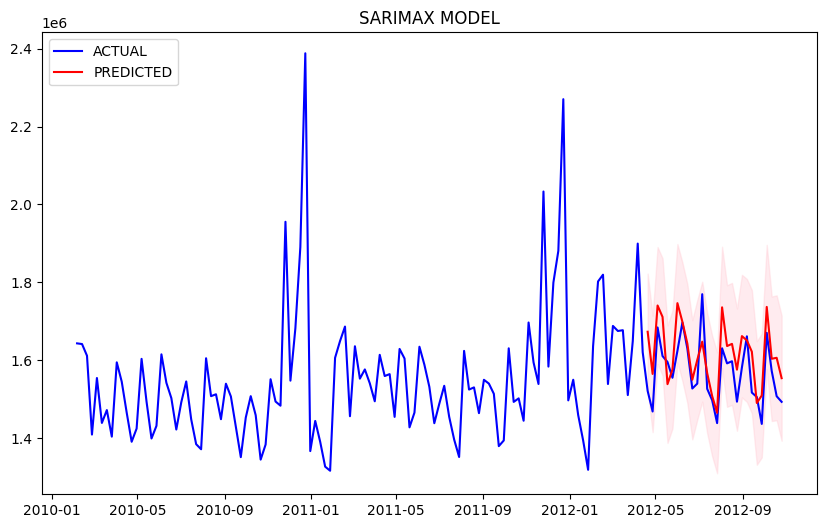

In [ ]:
from sklearn.metrics import mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
df=df.set_index(df["Date"])

from statsmodels.tsa.statespace.sarimax import SARIMAX
test_size=int(len(df[df["Store"]==1])*0.2)
train_size=int(len(df[df["Store"]==1])*0.8)

train=df[df["Store"]==1]["Weekly_Sales"][:115]

model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,52),
                enforce_stationarity=False,
                enforce_invertibility=False)

sarimax_results=model.fit()

  #print model summary
print(sarimax_results.summary())

  #forecast
forecast=sarimax_results.get_forecast(steps=test_size)
forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(weeks=1), periods=test_size, freq='W-FRI')
forecast_mean = forecast.predicted_mean.set_axis(forecast_index)
forecast_ci=forecast.conf_int().set_index(forecast_index)#confidence interval

#error
error=mean_squared_error(df[df['Store']==1]["Weekly_Sales"][115:],forecast_mean)
rmse=error**0.5
print(f"error={rmse}")
print(f"error%={mean_absolute_percentage_error(df[df['Store']==1]['Weekly_Sales'][115:],forecast_mean)}")
  #plot
plt.figure(figsize=(10,6))
plt.plot(df[df['Store']==1]["Weekly_Sales"],label='ACTUAL',color='blue')
plt.plot(forecast_mean,label='PREDICTED',color='red')
plt.fill_between(forecast_ci.index,
                   forecast_ci.iloc[:,0],
                   forecast_ci.iloc[:,1],color='pink',alpha=0.30)
plt.legend(loc='upper left')
plt.title('SARIMAX MODEL')
plt.show()



In [ ]:
int(len(df[df["Store"]==1])*0.2)

28

In [ ]:
143-28

115

Now let's do it for all stores collectively

In [ ]:
df1=df.groupby("Date")["Weekly_Sales"].sum().reset_index()
print(df1)
df1=df1.sort_values(by="Date")

          Date  Weekly_Sales
0   2010-02-05   49750740.50
1   2010-02-12   48336677.63
2   2010-02-19   48276993.78
3   2010-02-26   43968571.13
4   2010-03-05   46871470.30
..         ...           ...
138 2012-09-28   43734899.40
139 2012-10-05   47566639.31
140 2012-10-12   46128514.25
141 2012-10-19   45122410.57
142 2012-10-26   45544116.29

[143 rows x 2 columns]


In [ ]:
result=adfuller(df1["Weekly_Sales"])
print(f"pvalue={result[1]}")
if result[1]<=0.05:
  print("series is stationary")
else:
  print("series is not stationary")

pvalue=2.675979158986003e-07
series is stationary


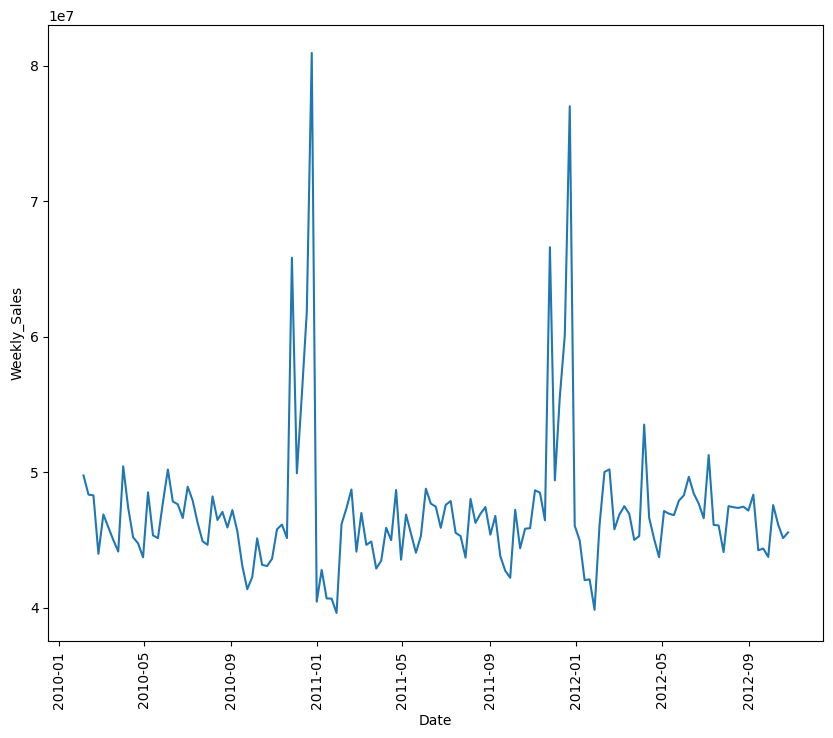

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df1["Date"],df1["Weekly_Sales"])
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1=df1.set_index(df1["Date"])
df1.asfreq("W-FRI")

,Date,Weekly_Sales
Date,,
2010-02-05,2010-02-05,49750740.50
2010-02-12,2010-02-12,48336677.63
2010-02-19,2010-02-19,48276993.78
2010-02-26,2010-02-26,43968571.13
2010-03-05,2010-03-05,46871470.30
...,...,...
2012-09-28,2012-09-28,43734899.40
2012-10-05,2012-10-05,47566639.31
2012-10-12,2012-10-12,46128514.25


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


error%=3.8878491288441253


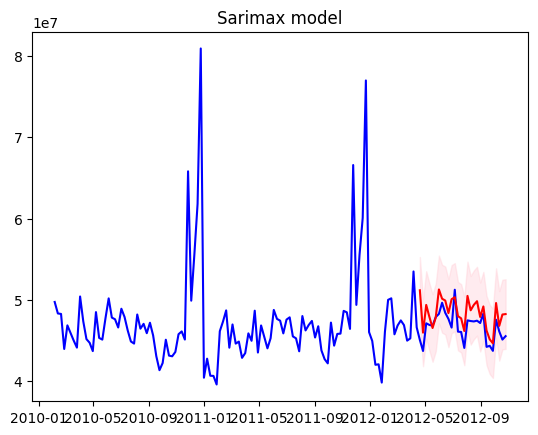

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from statsmodels.tsa.statespace.sarimax import SARIMAX
train1=df1["Weekly_Sales"][:115]
test1=df1["Weekly_Sales"][115:]

model=SARIMAX(train1,order=(1,1,1),seasonal_order=(1,1,1,52),enforce_stationarity=False,enforce_invertibility=False)

model_results=model.fit()

forecast=model_results.get_forecast(steps=28)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

print(f"error%={mean_absolute_percentage_error(test1,forecast_mean)}")

plt.plot(df1["Weekly_Sales"],label="ACTUAL",color="blue")
plt.plot(forecast_mean,label="PREDICTED",color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],color="pink",alpha=0.30)
plt.title("Sarimax model")
plt.show()


PROPHET MODEL

In [ ]:
pip install prophet

In [14]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

In [ ]:
df1.head()

,Date,Weekly_Sales
Date,,
2010-02-05,2010-02-05,49750740.50
2010-02-12,2010-02-12,48336677.63
2010-02-19,2010-02-19,48276993.78
2010-02-26,2010-02-26,43968571.13
2010-03-05,2010-03-05,46871470.30


In [ ]:
df1=df.groupby("Date")["Weekly_Sales"].sum().reset_index()
print(df1)
df1=df1.sort_values(by="Date")

          Date  Weekly_Sales
0   2010-02-05   49750740.50
1   2010-02-12   48336677.63
2   2010-02-19   48276993.78
3   2010-02-26   43968571.13
4   2010-03-05   46871470.30
..         ...           ...
138 2012-09-28   43734899.40
139 2012-10-05   47566639.31
140 2012-10-12   46128514.25
141 2012-10-19   45122410.57
142 2012-10-26   45544116.29

[143 rows x 2 columns]


In [ ]:
df1.columns=["ds","y"]

In [ ]:
df1.head()

,ds,y
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8cpxu1y/bglg_cao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8cpxu1y/_bq26i3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74961', 'data', 'file=/tmp/tmpn8cpxu1y/bglg_cao.json', 'init=/tmp/tmpn8cpxu1y/_bq26i3r.json', 'output', 'file=/tmp/tmpn8cpxu1y/prophet_modelwivwn5l5/prophet_model-20241230143938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 1118290.17
RMSE: 1477362.95


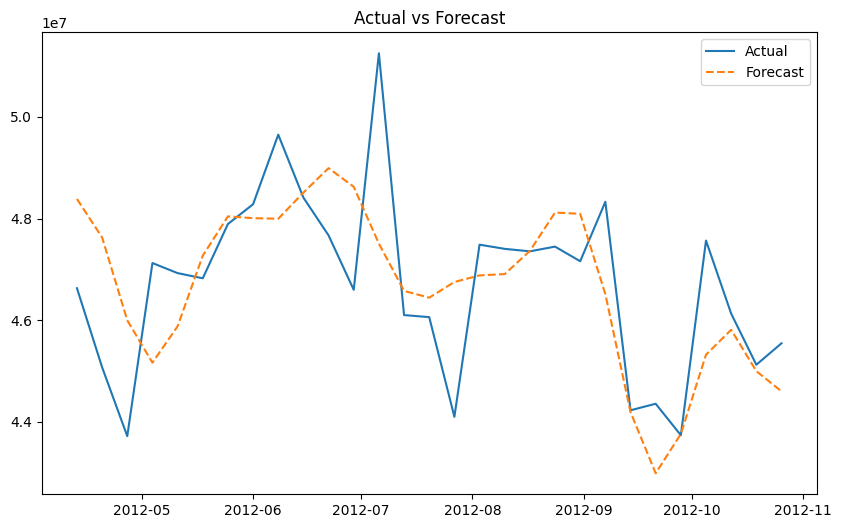

<function matplotlib.pyplot.show(close=None, block=None)>

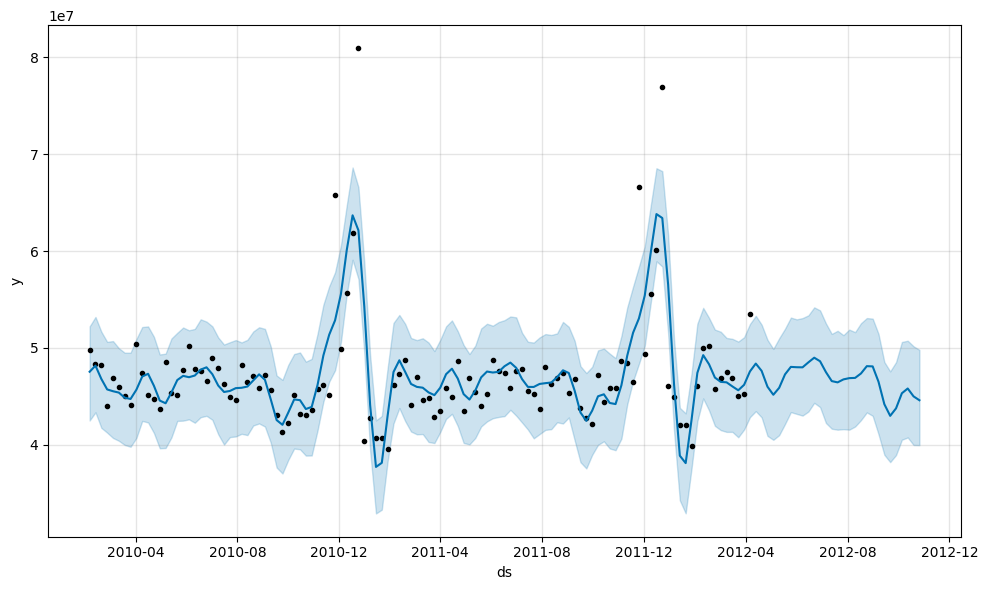

In [36]:

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Load your dataset
# Assuming 'data' is your DataFrame with columns 'ds' (date) and 'y' (target variable)
# data = pd.read_csv('your_dataset.csv')

# Convert 'ds' to datetime
df1['ds'] = pd.to_datetime(df1['ds'])

# Split into train and test sets
train_size = int(len(df1) * 0.8)
train = df1.iloc[:train_size]
test = df1.iloc[train_size:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train)

# Make future predictions
future = model.make_future_dataframe(periods=len(test), freq='W-FRI')  # Adjust frequency if necessary
forecast = model.predict(future)

# Evaluate model performance on test data
predicted = forecast[['ds', 'yhat']].iloc[-len(test):]
actual = test[['ds', 'y']]
actual = actual.merge(predicted, on='ds')

mae = mean_absolute_error(actual['y'], actual['yhat'])
rmse = np.sqrt(mean_squared_error(actual['y'], actual['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual['ds'], actual['y'], label='Actual')
plt.plot(actual['ds'], actual['yhat'], label='Forecast', linestyle='--')
plt.legend()
plt.title('Actual vs Forecast')
plt.show()

fig=model.plot(forecast)
plt.show


In [38]:
#As per evaluation, the PROPHET model looks better.
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"error%={mean_absolute_percentage_error(actual['y'], actual['yhat'])}")

error%=2.3867963884140853
